# write time breakdown

In [78]:
from sc23_utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
def draw(ax, time_seconds, title, scales):
    # scales = ("256", "512")
    width = 0.4
    bottom = np.zeros(2)
    # colors=['lightgray', 'red']
    colors=['lightgray', 'royalblue']
    # colors=['orangered', 'lightgray']

    for i, (boolean, ts) in enumerate(time_seconds.items()):
        p = ax.bar(scales, ts, width, label=boolean, bottom=bottom, color=colors[i])
        bottom += ts

    ax.set_title(title)

In [80]:
from matplotlib.ticker import FormatStrFormatter


def draw_plot(data, ofname, figtitle, scales, logscale=False, ymin=0.1, ymax=100):
    fig, axes = plt.subplots(nrows=1,
                             ncols=4,
                             figsize=(6, 3),
                             sharex='all',
                             sharey='all',
                             dpi=100)
    for ax, (title, time_seconds) in zip(axes, data.items()):
        draw(ax, time_seconds, title, scales)
        ax.set_axisbelow(True)
        ax.grid(axis='y', lw=0.5, color='lightgray', ls="-")
        if not logscale:
            ax.tick_params(axis='both', which='both', length=0)
        ax.yaxis.set_major_formatter(fmt)
    
    axes[0].set_ylabel("Time (Seconds)")
    axes[-1].legend(fontsize=11)

    if logscale:
        ax = axes[0]
        ax.set_yscale('log')
        ax.set_ylim((ymin, ymax))

        ## set y ticks
        y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
        ax.yaxis.set_major_locator(y_major)
        y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        ax.yaxis.set_minor_locator(y_minor)
        ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    sns.despine(left=True, top=False)
    fig.suptitle(figtitle + ": Write-Time Breakdown")
    fig.tight_layout()

    date, time = date_time_prefix()
    fig.savefig(f"{date}_{ofname}_{time}.pdf", dpi=600)

    plt.show()

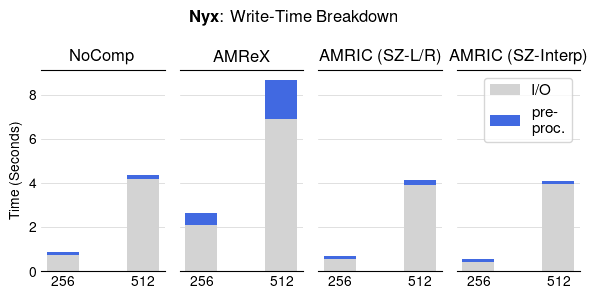

In [81]:
draw_plot(wtime_nyx, "wtime-nyx", r"\textbf{Nyx}", ("256", "512"))

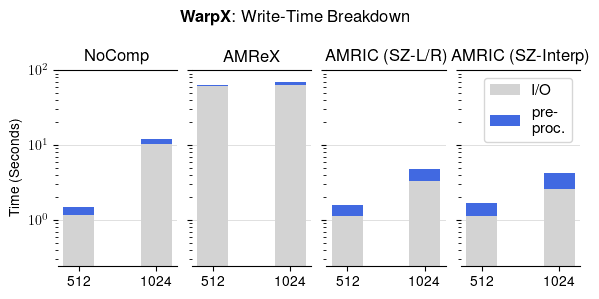

In [83]:
draw_plot(wtime_warpx_new, "wtime-warpx", r"\textbf{WarpX}", ("512", "1024"), True, 0.24, 100)

In [76]:
!rm *wtime*.pdf